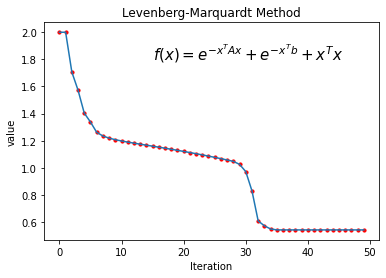

x_min = [[ 0.28403442]
 [ 0.2979158 ]
 [ 0.01357858]
 [ 0.32250073]
 [-0.05264246]
 [-0.27053968]]
value = 0.5423967748228894


In [92]:
import numpy as np
import matplotlib.pyplot as plt


class MyFunction(object):
    def __init__(self, A, b):
        self.A = A
        self.b = b
    
    def f_(self, x):
        f_x = np.exp(-x.T @ self.A @ x) + np.exp(-x.T @ self.b) + x.T @ x
        return f_x
    
    def g_(self, x):
        g_x = -2 * np.exp(-x.T @ self.A @ x) * self.A @ x - np.exp(-x.T @ self.b) * self.b + 2 * x
        return g_x
        
    def G_(self, x):
        G_x = -2 * np.exp(-x.T @ self.A @ x) * (self.A - 2 * (self.A @ x) @ (self.A @ x).T) \
              - np.exp(-x.T @ self.b) * self.b @ self.b.T + 2
        return G_x
        

def Lev_Mar(fun, x):
    Max_Iter = 50
    Epsilon = 1e-5
    
    mu = 0.01
    y = []
    
    for i in range(Max_Iter):
        f, g, G = fun.f_(x), fun.g_(x), fun.G_(x)
        y.append(f[0][0])
        plt.scatter(i, y[-1], color='red', s=10)
        
        if np.sum(np.abs(g)) < Epsilon:
            break
        
        eig_val = np.linalg.eigvals(G + mu * np.eye(x.size))
        while (not np.all(eig_val > 0)):
            mu *= 4
            eig_val = np.linalg.eigvals(G + mu * np.eye(x.size))
            
        s = -np.linalg.inv(G + mu * np.eye(x.size)) @ g
        delta_f = fun.f_(x + s) - f
        delta_q = g.T @ s + 0.5 * s.T @ G @ s
        
        r = delta_f / delta_q
        if r < 0.25:
            mu *= 4
        elif r > 0.75:
            mu /= 2
        if r > 0:
            x += s
    
    plt.plot(y)
    plt.title('Levenberg-Marquardt Method')
    plt.xlabel('Iteration')
    plt.ylabel('value')
    plt.text(15, 1.8, '$f(x)=e^{-x^{T}Ax}+e^{-x^{T}b}+x^{T}x$', fontsize=15)
    plt.show()
    return x, y[-1]
        
        
np.random.seed(12021092)
d = 6
A = np.random.randint(-5, 5, (d, d))
b = np.random.randint(0, 10, (d, 1))
my_fun = MyFunction(A, b)
x0 = np.zeros((d, 1))
x, value = Lev_Mar(my_fun, x0)
print("x_min =", x)
print("value =", value)
